In [1]:
import os 
import requests 
for filename in ['time_series_covid19_confirmed_global.csv', 'time_series_covid19_deaths_global.csv', 
                 'time_series_covid19_recovered_global.csv', 'time_series_covid19_confirmed_US.csv', 
                 'time_series_covid19_deaths_US.csv']: 
    print(f'Downloading {filename}') 
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}' 
    myfile = requests.get(url) 
    open(filename, 'wb').write(myfile.content)



In [2]:
from datetime import datetime 
import pandas as pd 
def _convert_date_str(df): 
    try: df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[4:]] 
    except: 
        print('_convert_date_str failed with %y, try %Y') 
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[4:]] 
            
            
confirmed_global_df = pd.read_csv('time_series_covid19_confirmed_global.csv') 
_convert_date_str(confirmed_global_df) 
deaths_global_df = pd.read_csv('time_series_covid19_deaths_global.csv') 
_convert_date_str(deaths_global_df) 
recovered_global_df = pd.read_csv('time_series_covid19_recovered_global.csv') 
_convert_date_str(recovered_global_df)

In [3]:
deaths_global_df

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3664,3664,3664,3664,3666,3666,3666,3666,3666,3667


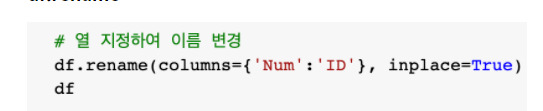

In [4]:
df_confirmed = deaths_global_df.drop(['Province/State', 'Lat','Long'], axis=1)
df_confirmed.rename(columns={'Country/Region':'Country_Region'}, inplace = True)
df_confirmed

,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
1,Albania,0,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029
2,Algeria,0,0,0,0,0,0,0,0,0,...,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015
3,Andorra,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,Angola,0,0,0,0,0,0,0,0,0,...,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,0,0,0,0,0,0,0,0,0,...,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578
276,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770
277,Yemen,0,0,0,0,0,0,0,0,0,...,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935
278,Zambia,0,0,0,0,0,0,0,0,0,...,3664,3664,3664,3664,3666,3666,3666,3666,3666,3667


In [5]:
df_confirmed.to_csv("C:/Users/user/Documents/pandas_gogo/00_Material(Uploaded)/COVID-19-master/final_covid_data_for_graph.csv")

https://public.flourish.studio/visualisation/7883558/

In [6]:
country_info = pd.read_csv("C:/Users/user/Downloads/첫데이터분석_자료_저작권유념부탁_잔재미코딩_DaveLee_20211118/00_Material(Uploaded)/COVID-19-master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv", encoding='utf-8-sig', keep_default_na = False, na_values='')
country_info

,Unnamed: 0,Unnamed: 0.1,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key
0,0,0,NaN,BW,NaN,NaN,NaN,NaN,NaN,Botswana,NaN,NaN,Botswana
1,1,1,NaN,BI,NaN,NaN,NaN,NaN,NaN,Burundi,NaN,NaN,Burundi
2,2,2,NaN,SL,NaN,NaN,NaN,NaN,NaN,Sierra Leone,NaN,NaN,Sierra Leone
3,3,3,4.0,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan
4,4,4,8.0,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3555,3555,84056037.0,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US"
3556,3556,3556,84056039.0,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US"
3557,3557,3557,84056041.0,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US"
3558,3558,3558,84056043.0,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US"


In [7]:
country_info = country_info[['iso2', 'Country_Region']]
country_info

,iso2,Country_Region
0,BW,Botswana
1,BI,Burundi
2,SL,Sierra Leone
3,AF,Afghanistan
4,AL,Albania
...,...,...
3555,US,US
3556,US,US
3557,US,US
3558,US,US


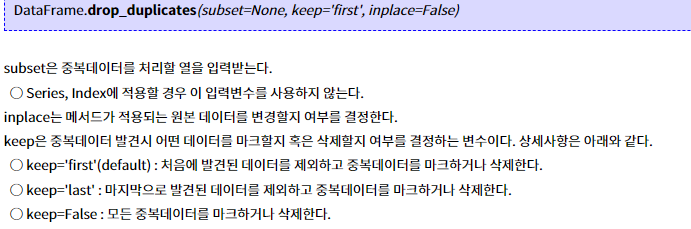

In [8]:
country_info = country_info.drop_duplicates(subset='Country_Region', keep = 'first')
country_info

,iso2,Country_Region
0,BW,Botswana
1,BI,Burundi
2,SL,Sierra Leone
3,AF,Afghanistan
4,AL,Albania
...,...,...
175,ZW,Zimbabwe
199,AU,Australia
207,CA,Canada
222,CN,China


In [9]:
doc_final_country = pd.merge(country_info, df_confirmed, on='Country_Region')
doc_final_country

,iso2,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,BW,Botswana,0,0,0,0,0,0,0,0,...,2409,2411,2411,2411,2411,2416,2416,2416,2416,2416
1,BI,Burundi,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
2,SL,Sierra Leone,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
3,AF,Afghanistan,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
4,AL,Albania,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,CN,China,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,CN,China,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
260,CN,China,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
261,CN,China,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [10]:
doc_final_country[doc_final_country['iso2'].isnull()]

,iso2,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
47,NaN,Diamond Princess,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
127,NaN,MS Zaandam,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


iso2가 결측인 행 제거

In [11]:
doc_final_country = doc_final_country.dropna(subset=['iso2'])
doc_final_country

doc_final_country[doc_final_country['iso2'].isnull()]

,iso2,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19


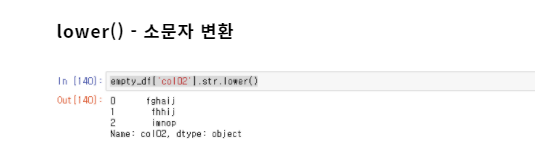

In [12]:
doc_final_country['iso2'] = doc_final_country['iso2'].str.lower()
doc_final_country

<ipython-input-12-eedb5cc5cab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc_final_country['iso2'] = doc_final_country['iso2'].str.lower()


,iso2,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,bw,Botswana,0,0,0,0,0,0,0,0,...,2409,2411,2411,2411,2411,2416,2416,2416,2416,2416
1,bi,Burundi,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
2,sl,Sierra Leone,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
3,af,Afghanistan,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
4,al,Albania,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,cn,China,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,cn,China,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
260,cn,China,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
261,cn,China,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [13]:
doc_final_country.loc[262,'iso2'] = 'us'
doc_final_country

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,iso2,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,bw,Botswana,0,0,0,0,0,0,0,0,...,2409,2411,2411,2411,2411,2416,2416,2416,2416,2416
1,bi,Burundi,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
2,sl,Sierra Leone,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
3,af,Afghanistan,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
4,al,Albania,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,cn,China,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,cn,China,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
260,cn,China,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
261,cn,China,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


국기 링크 만들기 함수

In [14]:
def create_flag_link(row):
    flag_link = 'https://flagcdn.com/48x36/' + row + '.png'
    return flag_link

doc_final_country['iso2'] = doc_final_country['iso2'].apply(create_flag_link)
doc_final_country

<ipython-input-14-c4551a8a2e98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc_final_country['iso2'] = doc_final_country['iso2'].apply(create_flag_link)


,iso2,Country_Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,https://flagcdn.com/48x36/bw.png,Botswana,0,0,0,0,0,0,0,0,...,2409,2411,2411,2411,2411,2416,2416,2416,2416,2416
1,https://flagcdn.com/48x36/bi.png,Burundi,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
2,https://flagcdn.com/48x36/sl.png,Sierra Leone,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
3,https://flagcdn.com/48x36/af.png,Afghanistan,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
4,https://flagcdn.com/48x36/al.png,Albania,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,https://flagcdn.com/48x36/cn.png,China,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,https://flagcdn.com/48x36/cn.png,China,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
260,https://flagcdn.com/48x36/cn.png,China,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
261,https://flagcdn.com/48x36/cn.png,China,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [15]:
cols = doc_final_country.columns.tolist()
cols

['iso2',
 'Country_Region',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26

In [16]:
cols.remove('iso2')
cols.insert(1, 'iso2')

In [17]:
doc_final_country = doc_final_country[cols]

In [18]:
doc_final_country.head()

,Country_Region,iso2,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,Botswana,https://flagcdn.com/48x36/bw.png,0,0,0,0,0,0,0,0,...,2409,2411,2411,2411,2411,2416,2416,2416,2416,2416
1,Burundi,https://flagcdn.com/48x36/bi.png,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
2,Sierra Leone,https://flagcdn.com/48x36/sl.png,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
3,Afghanistan,https://flagcdn.com/48x36/af.png,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
4,Albania,https://flagcdn.com/48x36/al.png,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029


In [19]:
cols[1] = 'Country_Flag'
doc_final_country.columns = cols
doc_final_country.head()

,Country_Region,Country_Flag,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-11-10,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
0,Botswana,https://flagcdn.com/48x36/bw.png,0,0,0,0,0,0,0,0,...,2409,2411,2411,2411,2411,2416,2416,2416,2416,2416
1,Burundi,https://flagcdn.com/48x36/bi.png,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
2,Sierra Leone,https://flagcdn.com/48x36/sl.png,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
3,Afghanistan,https://flagcdn.com/48x36/af.png,0,0,0,0,0,0,0,0,...,7291,7292,7292,7292,7293,7294,7295,7297,7297,7361
4,Albania,https://flagcdn.com/48x36/al.png,0,0,0,0,0,0,0,0,...,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029


In [20]:
doc_final_country.to_csv("C:/Users/user/Documents/pandas_gogo/00_Material(Uploaded)/COVID-19-master/final_covid_data_for_graph.csv")

### 그래프 만들기
- https://app.flourish.studio/ 로그인
- New visualization 선택 -> Bar Chart Race 선택 -> 데이터 수정 (파일 업로드)

https://app.flourish.studio/visualisation/7884112/edit